In [15]:
# 导入Pandas数据处理库
import pandas as pd

# 导入品类降维数据集
data = pd.read_csv('品类降维.csv')
data.head()

,序号,商品,销售增长率,市场占有率,渠道成熟度,用户好评度,品类
0,1,黑枸杞粉,7.0,3.2,4.7,1.4,2
1,2,舒缓眼膜,6.3,3.3,4.7,1.6,2
2,3,玫瑰香皂,6.5,2.8,4.6,1.5,2
3,4,原汁葡萄汁1升,5.0,3.4,1.5,0.2,1
4,5,薰衣草香皂,5.2,2.7,3.9,1.4,2


In [16]:
# 导入Sklearn中的PCA工具
from sklearn.decomposition import PCA

# 指定需要进行降维的特征
features = data[['销售增长率', '市场占有率',
                '渠道成熟度', '用户好评度']]

# 用PCA算法进行降维，并指定最终维度为2，便于可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

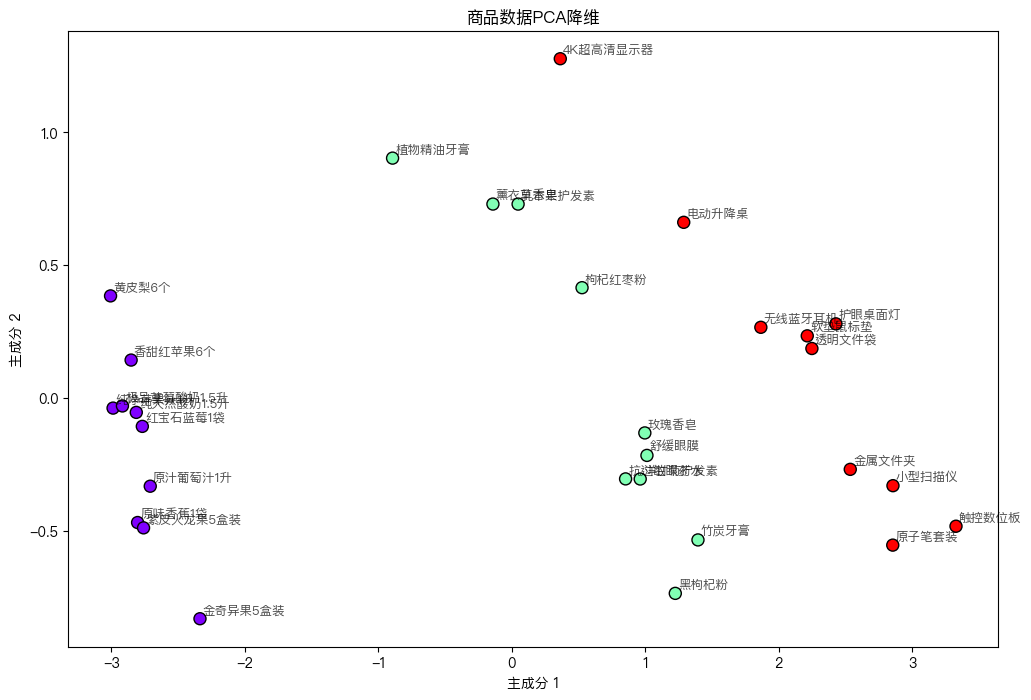

In [17]:
# 导入绘图工具Matplotlib中的绘图工具pyplot
import matplotlib.pyplot as plt
# 设置字体为SimHei，以正常显示中文标签
plt.rcParams["font.family"]=['PingFang']
plt.rcParams["font.sans-serif"]=['PingFang']
# 用来正常显示符号
plt.rcParams["axes.unicode_minus"]=False

# 创建一个新的图形，设置大小12x8
plt.figure(figsize=(12, 8))

# 在图上绘制降维后的数据点
plt.scatter(reduced_data[:, 0],
            reduced_data[:, 1],
            c=data['品类'], # 设置颜色
            cmap='rainbow', # 设置颜色映射
            edgecolor='k', # 设置数据点边界颜色
            s=75 # 设置点的大小
            )

# 为每个数据点添加注释，用商品名标记每个点
offset = 0.02 # 增加一个偏移量，使得标签离数据点有一些距离
for i, name in enumerate(data['商品']):
    plt.annotate(name, (reduced_data[i, 0] + offset,
                        reduced_data[i, 1] + offset),
                        fontsize=9, alpha=0.7)

# 设置图的标题和x、y轴的标签
plt.title('商品数据PCA降维')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')

# 去掉网格
plt.grid(False)

# 显示图形
plt.show()